In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd 
import librosa
import librosa.display

In [6]:
ipd.Audio("audios\common_voice_uz_37309252.mp3")

In [7]:
# list of all audios files
import os 
audio_files = os.listdir('audios')
audio_files

['common_voice_uz_37309251.mp3',
 'common_voice_uz_37309252.mp3',
 'common_voice_uz_37309253.mp3']

In [8]:
data, sr = librosa.load("audios\common_voice_uz_37309252.mp3")

In [9]:
data

array([-4.0326839e-12,  4.1316442e-12, -3.9321732e-12, ...,
        3.0338688e-06,  4.5614402e-06,  0.0000000e+00], dtype=float32)

In [10]:
sr

22050

In [11]:
print(f'y: {data[:10]}')
print(f'shape y: {data.shape}')
print(f'sr: {sr}')

y: [-4.0326839e-12  4.1316442e-12 -3.9321732e-12  1.3956473e-11
  2.6290055e-12  7.3828478e-12 -1.7729098e-11  1.0027373e-11
  3.7077130e-11  1.0949772e-11]
shape y: (97638,)
sr: 22050


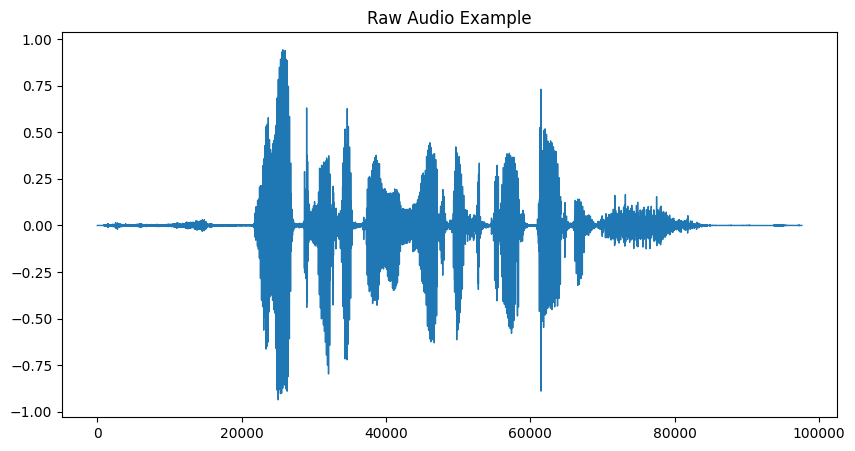

In [12]:
pd.Series(data).plot(figsize=(10, 5),
                     lw=1,
                     title="Raw Audio Example")
plt.show()


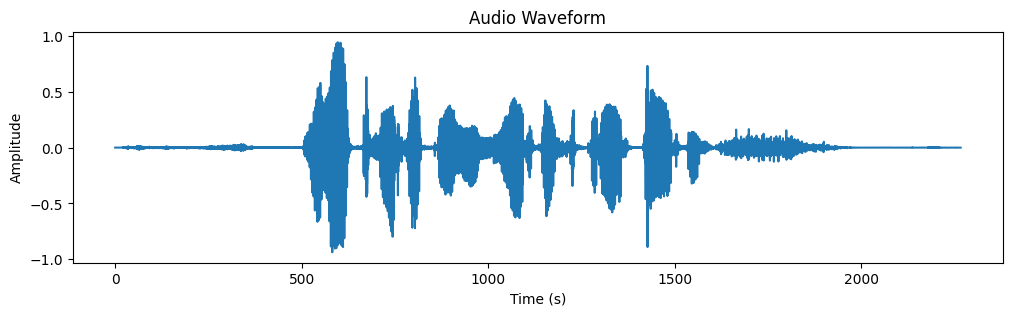

In [17]:
plt.figure(figsize=(12, 3))
plt.plot(librosa.times_like(data, sr=sr), data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Audio Waveform')
plt.show()

In [18]:
melspec = librosa.feature.melspectrogram(y=data, sr=sr)

In [19]:
melspec

array([[1.71248047e-08, 3.63687400e-06, 8.84472138e-06, ...,
        3.38345586e-07, 6.31075565e-08, 9.68536895e-08],
       [1.21413324e-08, 4.31607896e-06, 1.13694314e-05, ...,
        1.15849666e-07, 2.70846385e-07, 9.25957977e-08],
       [1.25299024e-08, 5.17273793e-06, 2.49587629e-05, ...,
        3.07749588e-07, 4.68665149e-07, 3.54224284e-07],
       ...,
       [3.64812874e-10, 1.45249757e-09, 1.18497123e-09, ...,
        7.88997409e-11, 5.17632215e-10, 1.96175431e-09],
       [7.11231907e-11, 2.74973100e-10, 1.09871362e-10, ...,
        1.50562098e-11, 2.79034157e-10, 1.16569865e-09],
       [4.22856303e-13, 1.61482524e-12, 7.41088451e-13, ...,
        5.39808947e-14, 1.72652188e-11, 8.46955631e-11]], dtype=float32)

In [20]:
log_s = librosa.amplitude_to_db(melspec)

In [21]:
log_s

array([[-17.358341, -17.358341, -17.358341, ..., -17.358341, -17.358341,
        -17.358341],
       [-17.358341, -17.358341, -17.358341, ..., -17.358341, -17.358341,
        -17.358341],
       [-17.358341, -17.358341, -17.358341, ..., -17.358341, -17.358341,
        -17.358341],
       ...,
       [-17.358341, -17.358341, -17.358341, ..., -17.358341, -17.358341,
        -17.358341],
       [-17.358341, -17.358341, -17.358341, ..., -17.358341, -17.358341,
        -17.358341],
       [-17.358341, -17.358341, -17.358341, ..., -17.358341, -17.358341,
        -17.358341]], dtype=float32)

Text(0.5, 1.0, 'Mel power spectogram')

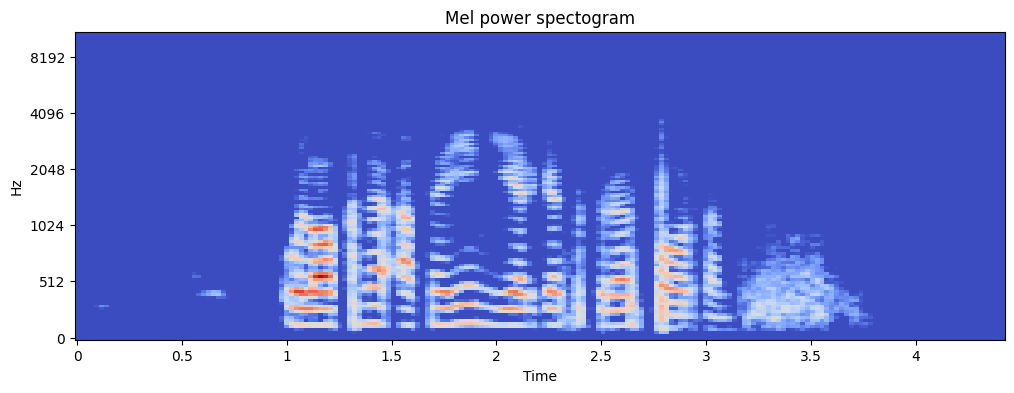

In [24]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(log_s, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel power spectogram')